<a href="https://colab.research.google.com/github/harshbisla/Bitcoin-Price-prediction/blob/main/predicting_bitcoin_prices_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense , Dropout , LSTM
from tensorflow.keras.models import Sequential
import requests

In [4]:
api_key = '454c916d5520413ea34eb9bdb5dc7170'
symbol = 'BTC/USD'
interval = '5min'
order = 'asc'
start_date = '2021-10-03 00:00:00'
end_date = '2021-10-20 00:00:00'
api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&apikey={api_key}'

In [8]:
data = requests.get(api_url).json()

In [10]:
data_final = pd.DataFrame(data['values'])

In [11]:
data_final

,datetime,open,high,low,close
0,2021-10-20 00:00:00,64300.01172,64381.44922,64235.94141,64257.17188
1,2021-10-19 23:55:00,64258.87891,64309.30859,64209.41016,64302.23047
2,2021-10-19 23:50:00,64437.71875,64437.71875,64230.64062,64243.85156
3,2021-10-19 23:45:00,64470.12891,64487.30859,64330.00000,64416.01172
4,2021-10-19 23:40:00,64426.26953,64465.21875,64366.05859,64453.55859
...,...,...,...,...,...
4880,2021-10-03 00:20:00,47696.42188,47800.28906,47696.42188,47745.17188
4881,2021-10-03 00:15:00,47729.85156,47790.03125,47671.51953,47692.07812
4882,2021-10-03 00:10:00,47736.80859,47757.73828,47697.87891,47727.98828
4883,2021-10-03 00:05:00,47814.57031,47832.17188,47721.78125,47744.39062


Squeezing data in range of 0 and 1

In [12]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data_final['close'].values.reshape(-1,1))

In [14]:
time_interval_to_train = 24
prediction_interval = 12
xtrain = []
ytrain = []

In [15]:
for i in range(time_interval_to_train,len(scaled_data)- prediction_interval) :
  xtrain.append(scaled_data[i - time_interval_to_train:i,0])
  ytrain.append(scaled_data[i + prediction_interval,0]) 

In [16]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [17]:
xtrain.shape

(4849, 24)

In [18]:
xtrain = np.reshape(xtrain , (xtrain.shape[0],xtrain.shape[1],1))

In [21]:
model = Sequential()
model.add(LSTM(128 , return_sequences = True , input_shape = (xtrain.shape[1],1),activation = 'relu'))
model.add(Dropout(0.4))
model.add(LSTM(64 , return_sequences = True,activation = 'relu'))
model.add(Dropout(0.3))
model.add(LSTM(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [22]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
model.fit(xtrain,ytrain,epochs = 10,batch_size = 64)

Epoch 1/10
76/76 [==============================] - 12s 95ms/step - loss: 0.0232 - accuracy: 2.0623e-04
Epoch 2/10
76/76 [==============================] - 7s 93ms/step - loss: 0.0020 - accuracy: 2.0623e-04
Epoch 3/10
76/76 [==============================] - 7s 94ms/step - loss: 0.0019 - accuracy: 2.0623e-04
Epoch 4/10
76/76 [==============================] - 7s 91ms/step - loss: 0.0018 - accuracy: 2.0623e-04
Epoch 5/10
76/76 [==============================] - 8s 100ms/step - loss: 0.0016 - accuracy: 2.0623e-04
Epoch 6/10
76/76 [==============================] - 10s 132ms/step - loss: 0.0016 - accuracy: 2.0623e-04
Epoch 7/10
76/76 [==============================] - 8s 105ms/step - loss: 0.0017 - accuracy: 2.0623e-04
Epoch 8/10
76/76 [==============================] - 7s 93ms/step - loss: 0.0015 - accuracy: 2.0623e-04
Epoch 9/10
76/76 [==============================] - 7s 93ms/step - loss: 0.0015 - accuracy: 2.0623e-04
Epoch 10/10
76/76 [==============================] - 7s 93ms/step - 

In [25]:
start_test = '2021-10-20 00:00:00'
end_test = '2021-10-23 00:00:00'
test_api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_test}&end_date={end_test}&interval={interval}&apikey={api_key}'
test_data = requests.get(test_api_url).json()
test_data_final = pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2021-10-23 00:00:00,60687.64062,60761.42969,60561.12109,60576.00000
1,2021-10-22 23:55:00,60717.87891,60720.78906,60680.14062,60696.71875
2,2021-10-22 23:50:00,60720.01172,60729.32031,60690.42969,60710.87891
3,2021-10-22 23:45:00,60754.98828,60796.92188,60720.00000,60720.50000
4,2021-10-22 23:40:00,60831.53906,60843.91016,60750.00000,60754.03906
...,...,...,...,...,...
850,2021-10-20 00:20:00,64137.69922,64166.08984,64083.42188,64083.42188
851,2021-10-20 00:15:00,64185.44922,64232.28906,64119.21875,64137.94141
852,2021-10-20 00:10:00,64133.71875,64207.78125,64133.71875,64177.23047
853,2021-10-20 00:05:00,64255.21875,64265.83984,64099.76953,64134.44922


In [28]:
bitcoin_prices = pd.to_numeric(test_data_final['close'],errors = 'coerce').values
test_inputs = test_data_final['close'].values
test_inputs =  test_inputs.reshape(-1,1)

In [29]:
model_inputs = scaler.fit_transform(test_inputs)

In [32]:
xtest = []
for x in range(time_interval_to_train,len(model_inputs)):
  xtest.append(model_inputs[x-time_interval_to_train:x , 0])

xtest = np.asarray(xtest)
xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [34]:
prediction_prices = model.predict(xtest)
prediction_prices = scaler.inverse_transform(prediction_prices)

26/26 [==============================] - 1s 21ms/step


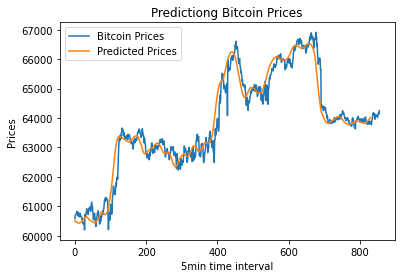

In [38]:
plt.plot(bitcoin_prices , label = 'Bitcoin Prices')
plt.plot(prediction_prices , label = 'Predicted Prices' )
plt.title('Predictiong Bitcoin Prices')
plt.xlabel('5min time interval')
plt.ylabel('Prices')
plt.legend()

In [39]:
last_data = model_inputs[len(model_inputs)+1 - time_interval_to_train : len(model_inputs) + 1 , 0]
last_data = np.array(last_data)

In [40]:
last_data = np.reshape(last_data ,(1,last_data.shape[0],1))

In [41]:
prediction = model.predict(last_data)
prediction = scaler.inverse_transform(prediction)

1/1 [==============================] - 1s 705ms/step


In [42]:
prediction

array([[63990.582]], dtype=float32)